In [49]:
import tensorflow.keras

In [50]:
import os
path = 'Alpha_KEITA_M2_DEV_Groupe1/training'
list_dir = os.listdir(path)
len(list_dir)

795

In [51]:
os.listdir(path)

['melanoma_0000139.jpg',
 'melanoma_0000141.jpg',
 'melanoma_0000142.jpg',
 'melanoma_0000143.jpg',
 'melanoma_0000144.jpg',
 'melanoma_0000145.jpg',
 'melanoma_0000146.jpg',
 'melanoma_0000147.jpg',
 'melanoma_0000148.jpg',
 'melanoma_0000149.jpg',
 'melanoma_0000150.jpg',
 'melanoma_0000151.jpg',
 'melanoma_0000152.jpg',
 'melanoma_0000153.jpg',
 'melanoma_0000154.jpg',
 'melanoma_0000155.jpg',
 'melanoma_0000156.jpg',
 'melanoma_0000157.jpg',
 'melanoma_0000158.jpg',
 'melanoma_0000159.jpg',
 'melanoma_0000160.jpg',
 'melanoma_0000161.jpg',
 'melanoma_0000162.jpg',
 'melanoma_0000163.jpg',
 'melanoma_0000164.jpg',
 'melanoma_0000165.jpg',
 'melanoma_0000166.jpg',
 'melanoma_0000167.jpg',
 'melanoma_0000168.jpg',
 'melanoma_0000169.jpg',
 'melanoma_0000170.jpg',
 'melanoma_0000171.jpg',
 'melanoma_0000172.jpg',
 'melanoma_0000173.jpg',
 'melanoma_0000174.jpg',
 'melanoma_0000175.jpg',
 'melanoma_0000176.jpg',
 'melanoma_0000278.jpg',
 'melanoma_0000279.jpg',
 'melanoma_0000280.jpg',


In [52]:
import pandas as pd

# Créez un DataFrame avec les noms des images et les labels correspondants
df = pd.DataFrame(os.listdir('Alpha_KEITA_M2_DEV_Groupe1/training'), columns=['filename'])
df['label'] = ['1' if 'melanoma' in name else '0' for name in df['filename']]
df

filename label
0    melanoma_0000139.jpg     1
1    melanoma_0000141.jpg     1
2    melanoma_0000142.jpg     1
3    melanoma_0000143.jpg     1
4    melanoma_0000144.jpg     1
..                    ...   ...
790     nevus_0029133.jpg     0
791     nevus_0029141.jpg     0
792     nevus_0029210.jpg     0
793     nevus_0029309.jpg     0
794     nevus_0029460.jpg     0

[795 rows x 2 columns]

In [53]:
import pandas as pd

# Créez un DataFrame avec les noms des images et les labels correspondants
df_val = pd.DataFrame(os.listdir('Alpha_KEITA_M2_DEV_Groupe1/validation'), columns=['filename'])
df_val['label'] = ['1' if 'melanoma' in name else '0' for name in df_val['filename']]
df_val

filename label
0   melanoma_0000002.jpg     1
1   melanoma_0000004.jpg     1
2   melanoma_0000013.jpg     1
3   melanoma_0000022.jpg     1
4   melanoma_0000026.jpg     1
5   melanoma_0000029.jpg     1
6   melanoma_0000030.jpg     1
7   melanoma_0000031.jpg     1
8   melanoma_0000035.jpg     1
9   melanoma_0000036.jpg     1
10  melanoma_0000040.jpg     1
11  melanoma_0000043.jpg     1
12  melanoma_0000046.jpg     1
13  melanoma_0000049.jpg     1
14  melanoma_0000054.jpg     1
15  melanoma_0000056.jpg     1
16     nevus_0000000.jpg     0
17     nevus_0000001.jpg     0
18     nevus_0000003.jpg     0
19     nevus_0000005.jpg     0
20     nevus_0000006.jpg     0
21     nevus_0000007.jpg     0
22     nevus_0000008.jpg     0
23     nevus_0000009.jpg     0
24     nevus_0000010.jpg     0
25     nevus_0000011.jpg     0
26     nevus_0000012.jpg     0
27     nevus_0000014.jpg     0
28     nevus_0000015.jpg     0
29     nevus_0000016.jpg     0
30     nevus_0000017.jpg     0
31     nevus_0000018.jpg     0

In [54]:
# Répartion des labels dans le jeu d'entrainement
df.label.value_counts()

label
1    438
0    357
Name: count, dtype: int64

In [55]:
# Répartion des labels dans le jeu d'entrainement
df_val.label.value_counts()

label
1    16
0    16
Name: count, dtype: int64

In [56]:
# Colonne contenant le nom des images
df.filename

0      melanoma_0000139.jpg
1      melanoma_0000141.jpg
2      melanoma_0000142.jpg
3      melanoma_0000143.jpg
4      melanoma_0000144.jpg
               ...         
790       nevus_0029133.jpg
791       nevus_0029141.jpg
792       nevus_0029210.jpg
793       nevus_0029309.jpg
794       nevus_0029460.jpg
Name: filename, Length: 795, dtype: object

In [57]:
import tensorflow

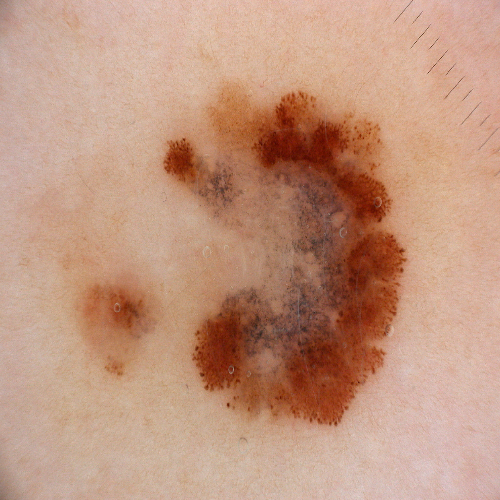

In [58]:
from tensorflow.keras.preprocessing import image

path = 'Alpha_KEITA_M2_DEV_Groupe1/training/'

# Affichage d'une image
img = image.load_img(path+df.filename[10], target_size=(500, 500))
img

In [59]:
image_1 = image.img_to_array(img)
image_1.max()

240.0

In [60]:
image_1.shape

(500, 500, 3)

In [61]:
image_1.shape

(500, 500, 3)

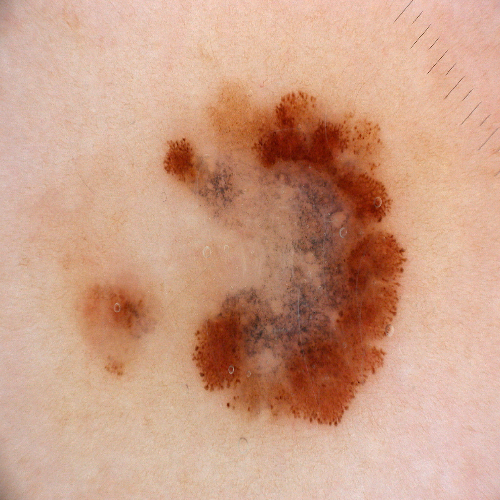

In [62]:
image_2 = image_1/255
image.array_to_img(image_2)

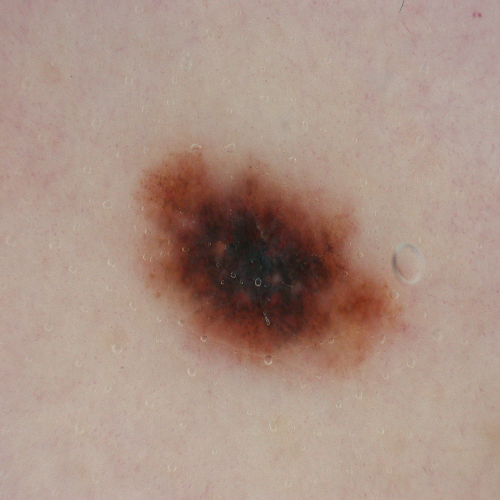

In [63]:
def show_img(n_img, return_img=False, path='Alpha_KEITA_M2_DEV_Groupe1/training/', size=(500, 500)):
    # Affichage de l'image
    img = image.load_img(path+df.filename[n_img], target_size=size)
    if return_img:
        return image.img_to_array(img)
    else:
        return img

image_1 = show_img(0, return_img=True)
show_img(1)

In [64]:
# Conception du modèle CNN
# Couche de convolution MaxPooling
import numpy as np
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.models import Sequential

model_maxpooling = Sequential()
model_maxpooling.add(MaxPool2D(pool_size=(4,4), input_shape=(500,500,3)))

model_maxpooling.summary()

c:\Users\alpha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\pooling\base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 125, 125, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Dimension de l'image (125, 125, 3)


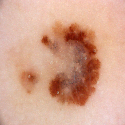

In [65]:
image_out = model_maxpooling.predict(np.array([image_2]))[0]

print("Dimension de l'image", image_out.shape)
image.array_to_img(image_out/255)

In [66]:
# Couche torflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D

model_cov2d = Sequential()
model_cov2d.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(500,500,3), activation='relu'))

image_out = model_cov2d.predict(np.array([image_2]))

image_out[0].shape

c:\Users\alpha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


(498, 498, 32)

In [67]:
model_cov2d.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 498, 498, 32)   │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
len(model_cov2d.weights)
model_cov2d.weights[0].shape

TensorShape([3, 3, 3, 32])

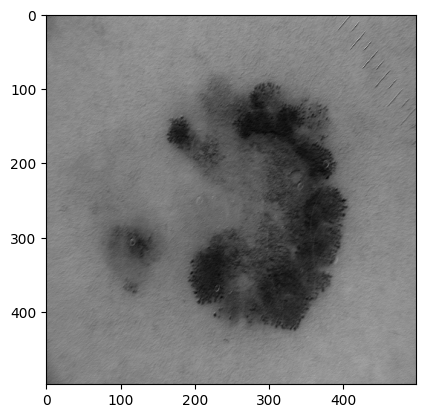

In [69]:
import matplotlib.pyplot as plt

plt.imshow(np.transpose(image_out[0], (2,0,1))[8], cmap='gray')

In [70]:
# Couches de convolution Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_flatten = Sequential()
model_flatten.add(Flatten(input_shape=(500,500,3)))

image_out = model_flatten.predict(np.array([image_1]))

image_out.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\alpha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(1, 750000)

In [71]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

# Conception d'un modèle de réseau de neuronne à convolution
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(250, 250, 3)),
    Dropout(0.4),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.4),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.4),
    Flatten(),

    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 248, 248, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 222784)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     7,129,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,185,473 (27.41 MB)

 Trainable params: 7,185,473 (27.41 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
img = image.load_img(path+df.filename[0], target_size=(250, 250))

model.predict(image.img_to_array(img).reshape(1,250,250,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.8938659]], dtype=float32)

In [73]:
# ENTRAINEMENT DU MODELE

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créez un générateur d'images à partir du DataFrame
datagen = ImageDataGenerator(rescale=1./255)  # Rééchelonne les valeurs des pixels entre 0 et 1

# Générateur d'images à partir du DataFrame
generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path,
    x_col='filename',
    y_col='label',
    target_size=(250, 250),
    class_mode='binary',
    batch_size=32
)

generator_val = datagen.flow_from_dataframe(
    dataframe=df_val,
    directory='Alpha_KEITA_M2_DEV_Groupe1/validation/',
    x_col='filename',
    y_col='label',
    target_size=(250, 250),
    class_mode='binary',
    batch_size=32
)


# Entraînez le modèle en utilisant le générateur d'images
history = model.fit(generator, epochs=10,validation_data=generator_val)

Found 795 validated image filenames belonging to 2 classes.
Found 32 validated image filenames belonging to 2 classes.
Epoch 1/10


c:\Users\alpha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5157 - loss: 4.1680 - val_accuracy: 0.3750 - val_loss: 0.7070
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5786 - loss: 0.6691 - val_accuracy: 0.5312 - val_loss: 0.7010
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6203 - loss: 0.6430 - val_accuracy: 0.5000 - val_loss: 0.7059
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6853 - loss: 0.5666 - val_accuracy: 0.5000 - val_loss: 0.7263
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7018 - loss: 0.5621 - val_accuracy: 0.5938 - val_loss: 0.6573
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7570 - loss: 0.4917 - val_accuracy: 0.5938 - val_loss: 0.6395
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.7480 - loss: 0.5493 - val_accuracy: 0.5938 - val_loss: 0.6524
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7303 - loss: 0.4860 - val_accuracy: 0.5000 - val_loss: 0.6950
Epo

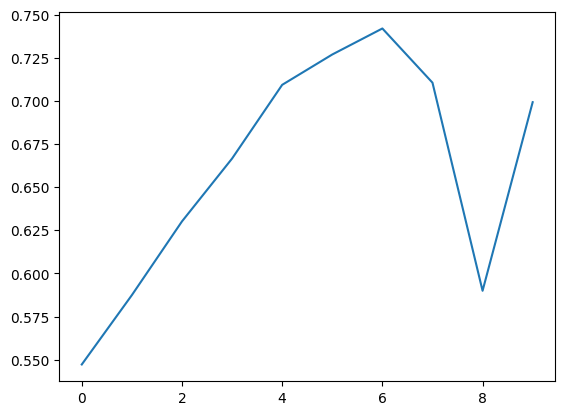

In [74]:
plt.plot(history.history['accuracy'])

(250, 250, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


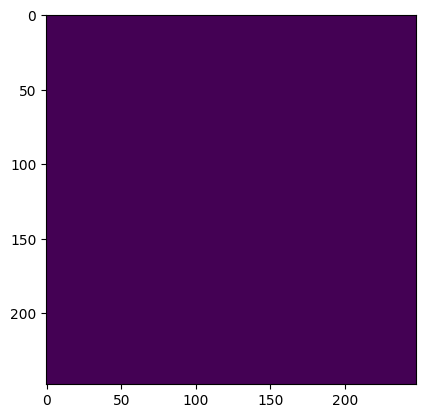

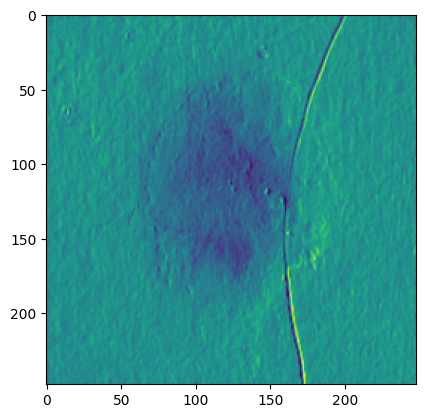

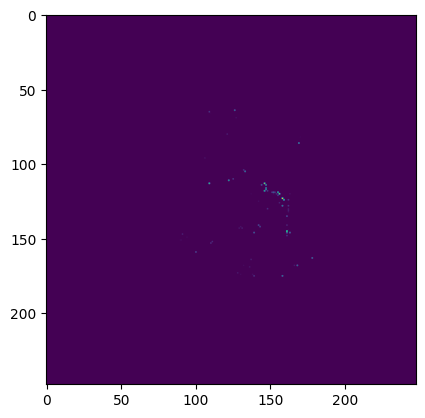

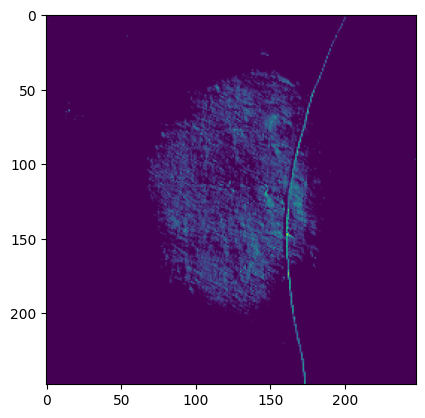

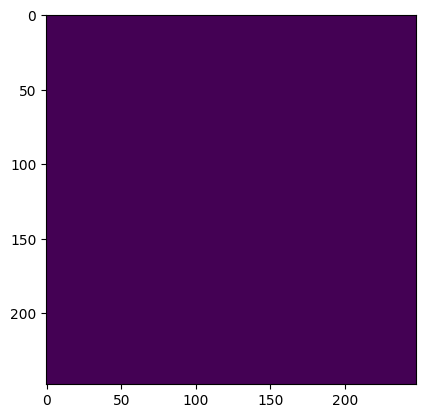

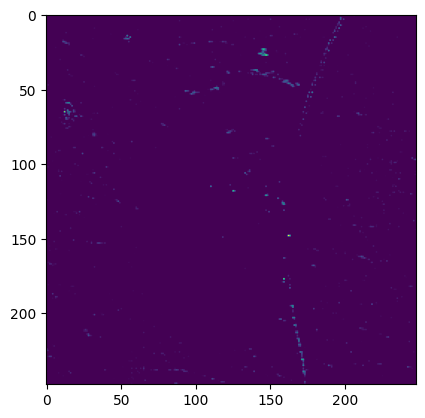

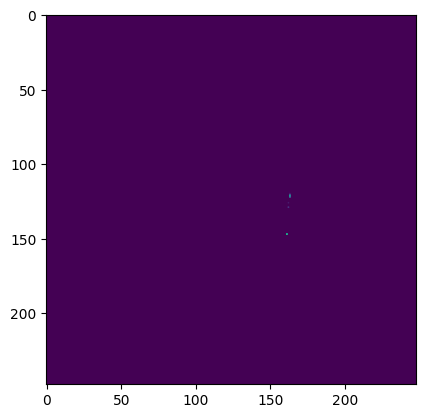

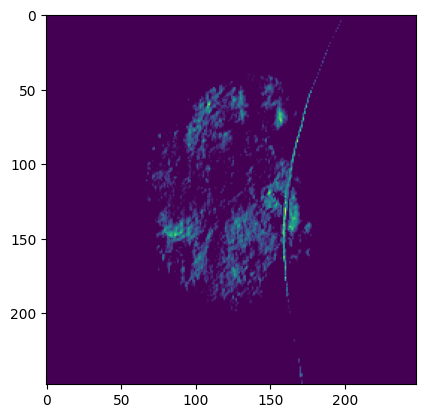

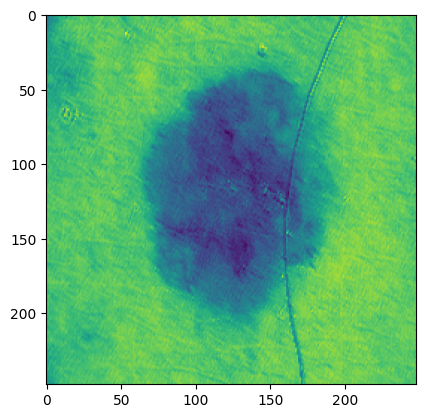

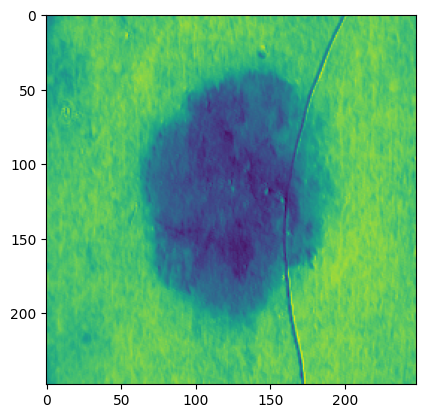

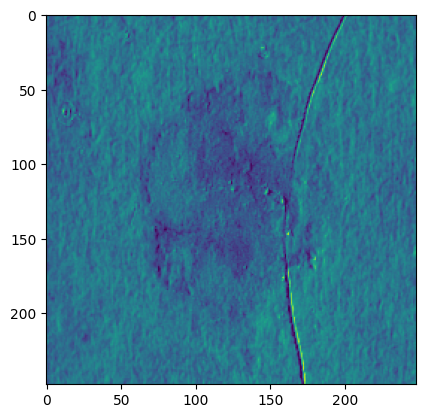

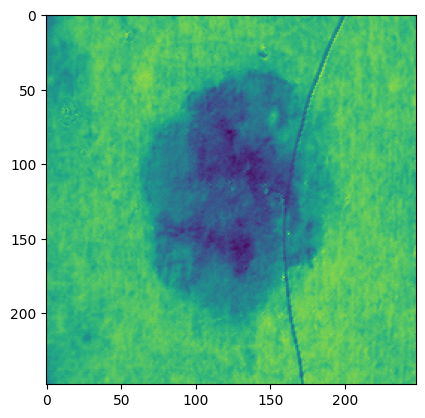

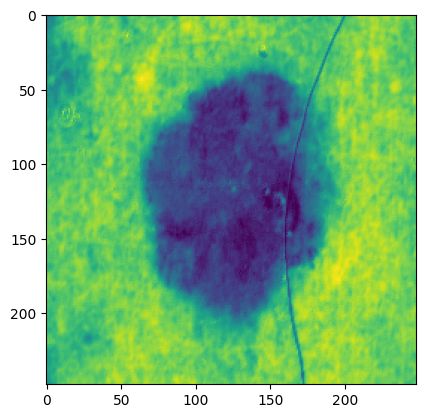

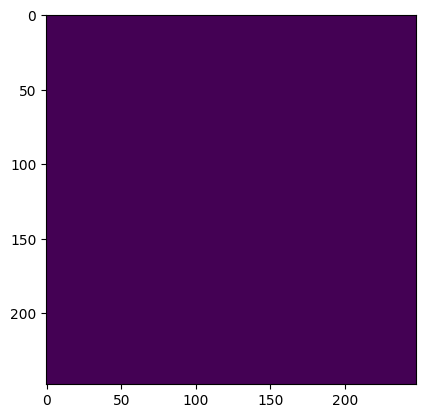

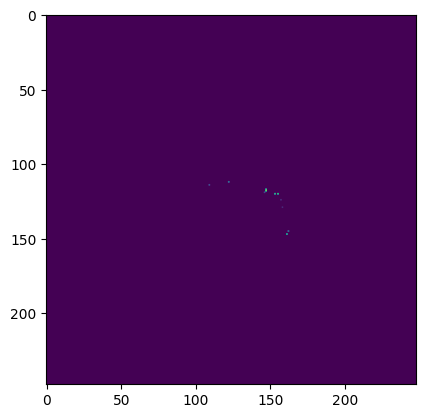

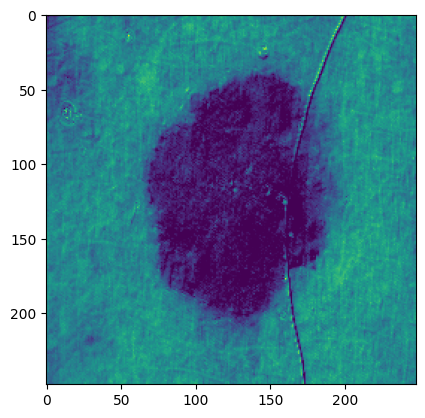

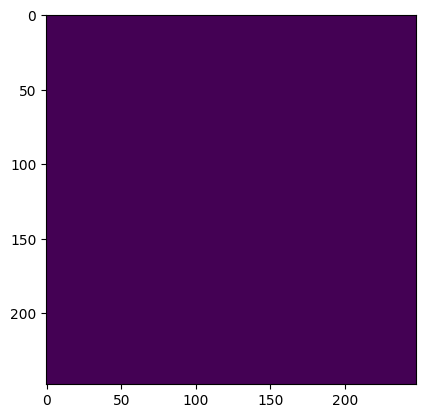

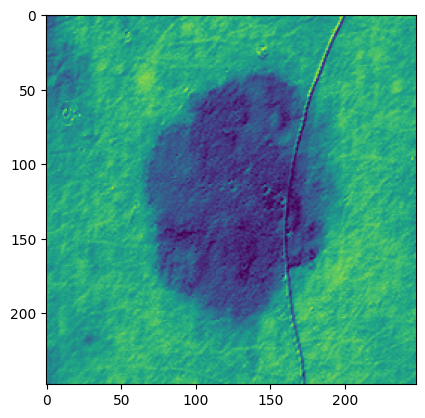

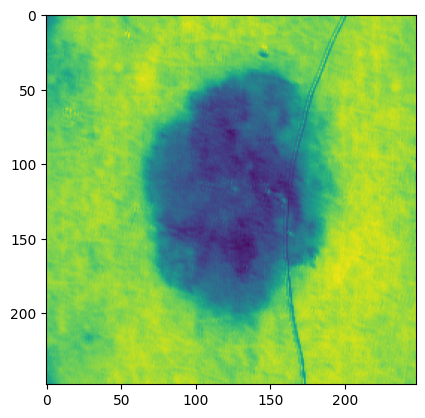

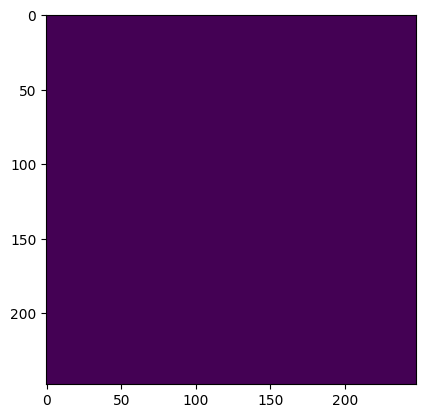

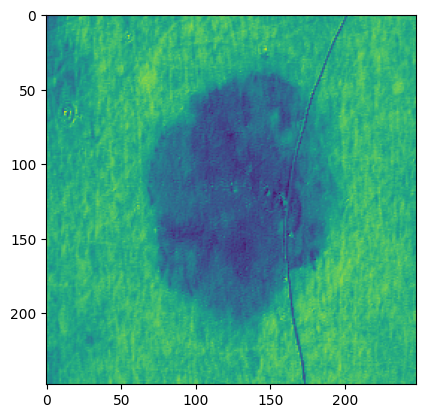

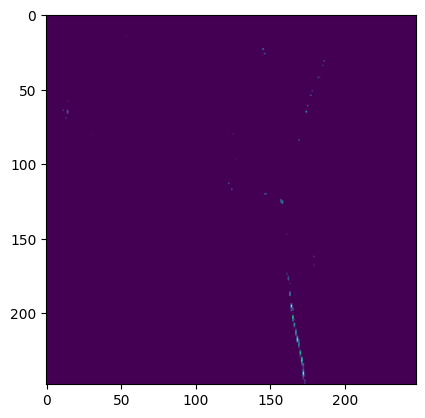

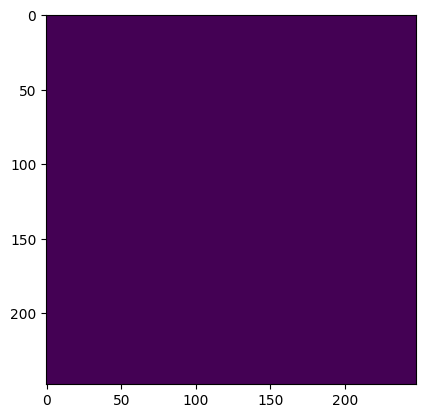

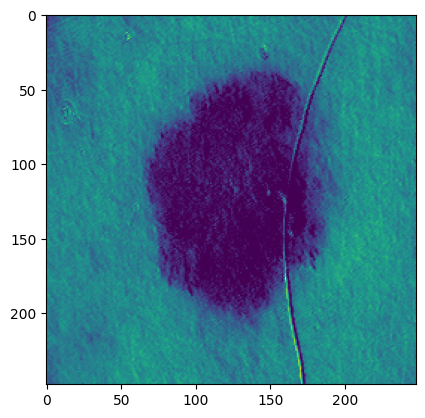

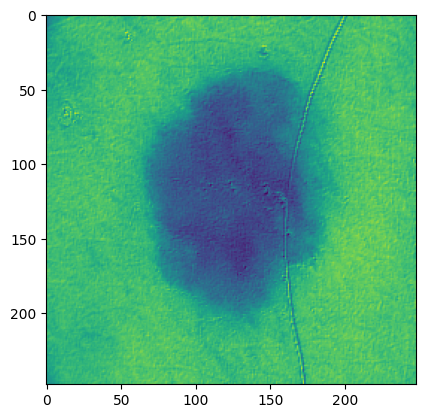

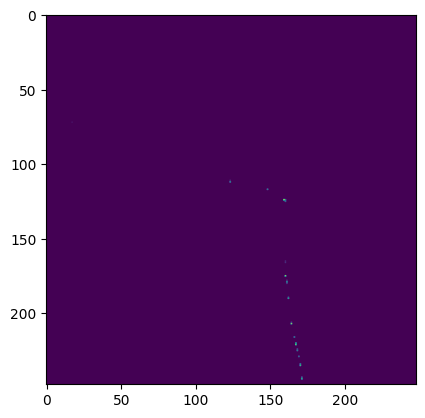

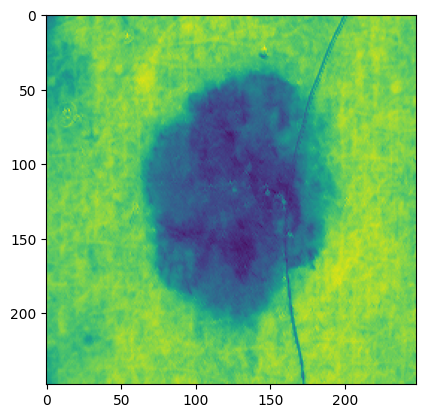

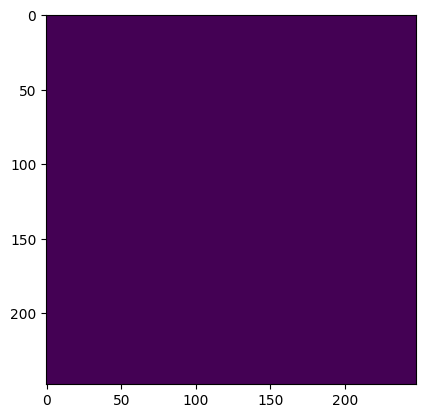

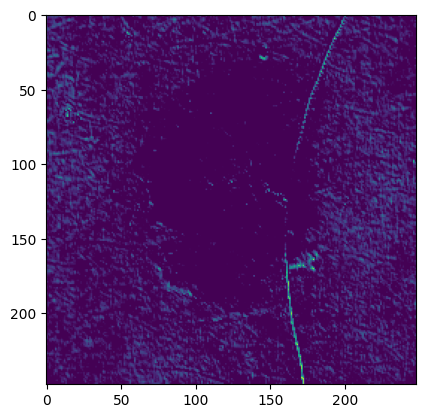

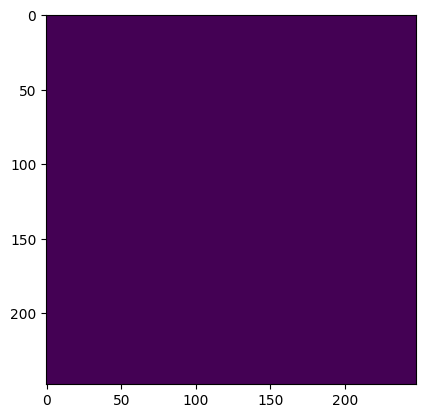

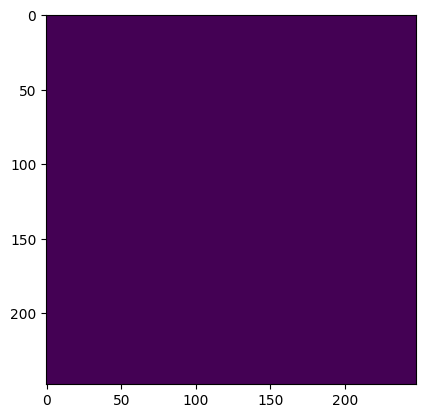

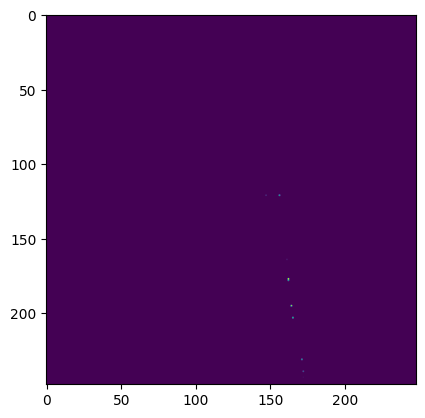

In [75]:
import numpy as np
import matplotlib.pyplot as plt

#Conv2D après entrainement
conv2d = model.layers[0]

# Création d'un nouveau modèle Sequential
model_conv2d = Sequential()

# Ajout de la couche Conv2d au modèle
model_conv2d.add(conv2d)

# Import d'une image
img = show_img(0, True, size=(250,250))
print(img.shape)

# Prédiction de la couche conv2d
img_filtres = model_conv2d.predict(np.array([img]))

for n in range(32): # Affichage des filtres
  plt.imshow(np.transpose(img_filtres[0], (2,0,1))[n]) # avec permutation des colonnes
  plt.show()

In [76]:
model.save('model.h5')

In [77]:
from tensorflow.keras.applications import ResNet50

# Charger le modèle ResNet50 pré-entraîné
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(500, 500, 3))

base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 500, 500,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 506, 506,  │          0 │ input_layer_13[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 250, 250,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 250, 250,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 250, 250,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 252, 252,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 125, 125,  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 125, 125,  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 125, 125,  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 125, 125,  │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 125, 125,  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 125, 125,  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 125, 125,  │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 125, 125,  │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 125, 125,  │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 125, 125,  │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 125, 125,  │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [78]:
len(base_model.layers)/3

58.333333333333336

In [79]:
len(base_model.layers)

175

In [80]:
base_model.layers[0].trainable = False

In [81]:
for layer in base_model.layers:
    layer.trainable = False

In [82]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 500, 500,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 506, 506,  │          0 │ input_layer_13[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 250, 250,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 250, 250,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 250, 250,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 252, 252,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 125, 125,  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 125, 125,  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 125, 125,  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 125, 125,  │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 125, 125,  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 125, 125,  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 125, 125,  │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 125, 125,  │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 125, 125,  │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 125, 125,  │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 125, 125,  │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


# Créer un nouveau modèle Sequential
model = Sequential()

# Ajouter le modèle ResNet50 à votre nouveau modèle
model.add(base_model)

# Ajouter une nouvelle couche Flatten à la fin du modèle
model.add(Flatten())

# Ajouter une nouvelle couche Dense à la fin du modèle
model.add(Dense(1, activation='sigmoid'))

model.summary()

ValueError: Undefined shapes are not supported.

ValueError: Undefined shapes are not supported.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.predict(image_1.reshape(1,500,500,3))

ValueError: Sequential model 'sequential_6' has already been configured to use input shape (1, 500, 500, 3). You cannot build it with input_shape (1, 224, 224, 3)